**NAME: Somto Anyaegbu
<br>
ID: 801215537
<br>
Github: https://github.com/Somto-Dera/ECGR5090-Machine-Learning.git**

# Homework 3
In this homework, we will use the cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.) Also, sample code for accessing and cleaning up the dataset provided in Canvas. For the evaluation of this homework across all problems, use 80%, 20% split.

 

**STEPS**
<br>
* Import Needed libraries
* Data Preparation
    * Load and understand data
    * Perform minor EDA
    
* Problem 1: Logistic Regression Model
    * Split dataset into X and y variables
    * Split the data into training and test data set
    * Scale sets
    * Build the Logistic Regression model
    * Evaluate the model
        * Calculate accuracy, recall, precision and log loss error
        * Confusion Metrics
    

* Problem 2: PCA-Logistic Regression Model
    * Split the data into X and y
    * Split the data into training and test data set
    * For all ks
        * Train the PCA model
        * Apply PCA model to the test data
        * Train the Logistic Regression model
        * Evaluate the model
            * Calculate accuracy, recall, precision and log loss error
            * Confusion Metrics
        * Plot metrics of different ks
        
        
* Problem 3: LDA-Bayes Model
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Fit LDA model
    * Build the Gaussian NB model
    * Apply model to the test data
    * Evaluate the model
        * Calculate accuracy, recall, precision and log loss error
        * Confusion Metrics
        
        
* Problem 4: LDA-Logistic Regression Model
    * Split the data into X and y
    * Split the data into training and test data set
    * Scale train and test set
    * Fit LDA model
    * Build the Logistic Regression model
    * Apply model to the test data
    * Evaluate the model
        * Calculate accuracy, recall, precision and log loss error
        * Confusion Metrics
        

<br> 

**Import Library**

In [1]:
# pandas is used for data manipulation and analysis
import pandas as pd     

# numpy is used for array and matrics manipulation
import numpy as np

# matplotlib is used for data visualisation
import matplotlib.pyplot as plt

# seaborn is used for data visualization (heat map)
import seaborn as sns

# sklearn-metrics is used for measuring classification peformance
from sklearn import metrics

from sklearn import model_selection

# sklearn-logreg is used for creating logreg model
from sklearn.linear_model import LogisticRegression

# sklearn-traintestsplit is used for spliting dataset
from sklearn.model_selection import train_test_split, KFold, cross_val_predict

# sklearn-scaler is used for scaling dataset
from sklearn.preprocessing import StandardScaler

# sklearn-naive_bayes is used for creating GNB model
from sklearn.naive_bayes import GaussianNB

# sklearn-dataset is used for breast cancer dataset
from sklearn.datasets import load_breast_cancer

# sklearn-decomposition is used for performing PCA
from sklearn.decomposition import PCA

# sklearn-discriminant_analysis is used for performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#%matplotlib inline

<br> 


### Import and Display the first 5 rows of the dataset

In [2]:
# load dataset into diabetes variable
cancer_data = load_breast_cancer()

# To get first five rows from the dataset default value
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# create cancer variaable and pass feature columns into it
cancer_dataframe = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# display 1-5 rows
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# display last 5 rows
cancer_dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# display shape of dataset
cancer_dataframe.shape

(569, 30)

In [6]:
cancer_dataframe.index

RangeIndex(start=0, stop=569, step=1)

In [7]:
# description of dataset
cancer_dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# concat target label column to cancer dataset
cancer_dataframe['targLabel'] = pd.DataFrame(load_breast_cancer().target)

# display 1-5 rows
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targLabel
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
# display last 5 rows
cancer_dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targLabel
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
# check for empty cell in dataset and sort
cancer_dataframe.isnull().sum().sort_values(ascending=False)[:10]

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
dtype: int64

In [11]:
# check column datatype
cancer_dataframe.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

cancer_dataframe['targLabel'].replace(0, 'Benign',inplace=True)
cancer_dataframe['targLabel'].replace(1, 'Malignant',inplace=True)
cancer_dataframe

<br>

---

---

---

### Problem 1
Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Can you train a logistic regression over these number of features maps? Draw your training results, including loss and classification accuracy over iterations.

In [12]:
# Split dataset in features and target sets
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

# Features, '[]' is used because X is a matrix
X = cancer_dataframe[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = cancer_dataframe.targLabel

# Print out first five rows of the X set
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (455, 30)
X_test dimension=  (114, 30)
y_train dimension=  (455,)
y_test dimension=  (114,)


In [14]:
# create an instance of StandardScaler
sc = StandardScaler() 

# Scale the test and train data set. 
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Print out scaled datasets
print("Scaled training features:\n", X_train_sc)
print("\nScaled testing features:\n", X_test_sc)

Scaled training features:
 [[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]

Scaled testing features:
 [[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.792

In [15]:
# Create an instance of Logistic Regression Classifier, fit the data and test the model.
lm = LogisticRegression().fit(X_train_sc,y_train)

# Predicting the test set results
y_pred=lm.predict(X_test_sc)

# Display results
print("Training set score: {:.5f}".format(lm.score(X_train_sc, y_train)))
print("Test set score: {:.5f}".format(lm.score(X_test_sc, y_test)))
print("Predictions: ", (y_pred))

Training set score: 0.98681
Test set score: 0.97368
Predictions:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


Text(0.5, 257.44, 'Predicted label')

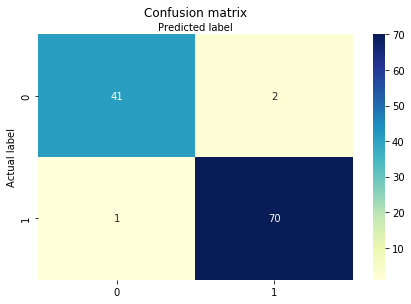

In [16]:
# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

print("Log Loss:",metrics.log_loss(y_test, y_pred))

# prints classification error of the model
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Accuracy: 0.9736842105263158
Log Loss: 0.9089291963122152
Classification Error: 0.02631578947368418
Precision: 0.9722222222222222
Recall/Sensitivity: 0.9859154929577465
Specificity: 0.9534883720930233
Class Distribution:

1    71
0    43
Name: targLabel, dtype: int64


---

### Extra Work(Not Part of hw)

In [18]:
# Applying 10-Fold Cross Validation
kfold = KFold(n_splits=10, random_state=100, shuffle= True)

# create instance of log regression object
lr_kfold = LogisticRegression(solver='lbfgs', max_iter=10000)

# create kfold Logistic Regression model
lst_kfold_acc = model_selection.cross_val_score(lr_kfold, X = X_train_sc, y= y_train, cv=kfold, scoring="accuracy")

# convert scores to percent
#lst_kfold_acc = [val * 100.0 for val in lst_kfold_acc]
#lst_kfold_acc = ['%.5f' % val for val in lst_kfold_acc]

lst_kfold_loss = model_selection.cross_val_score(lr_kfold, X = X_train_sc, y= y_train, cv=kfold, scoring="neg_log_loss")

# convert scores to percent
#lst_results_kfold = [val * 100.0 for val in results_kfold]
#lst_results_kfold = ['%.5f' % val for val in lst_results_kfold]

counts=1
for acc_val,loss_val in zip(lst_kfold_acc,lst_kfold_loss):
    print("Fold: %d " % (counts))
    print("Accuracy: %s" % (acc_val))
    print("Log Loss: %s" % (loss_val))
    counts = counts + 1
    

# print out model metrics
print("\nCV Accuracy: %.5f%%" % (lst_kfold_acc.mean()*100.0))
print("CV Loss: %.5f%%" % (lst_kfold_loss.mean()*100.0))
print("Standard Deviation: %.5f%%" % (lst_kfold_acc.std()*100.0))



Fold: 1 
Accuracy: 0.9782608695652174
Log Loss: -0.06680981901885381
Fold: 2 
Accuracy: 1.0
Log Loss: -0.021019926801766894
Fold: 3 
Accuracy: 0.9782608695652174
Log Loss: -0.04718110675298019
Fold: 4 
Accuracy: 1.0
Log Loss: -0.02126199480817482
Fold: 5 
Accuracy: 1.0
Log Loss: -0.038790552016350226
Fold: 6 
Accuracy: 0.9777777777777777
Log Loss: -0.051566061294445235
Fold: 7 
Accuracy: 1.0
Log Loss: -0.04836462086639371
Fold: 8 
Accuracy: 0.9555555555555556
Log Loss: -0.14979828865005837
Fold: 9 
Accuracy: 0.9777777777777777
Log Loss: -0.07056001081736686
Fold: 10 
Accuracy: 0.9111111111111111
Log Loss: -0.2902008984897155

CV Accuracy: 97.78744%
CV Loss: -8.05553%
Standard Deviation: 2.62944%


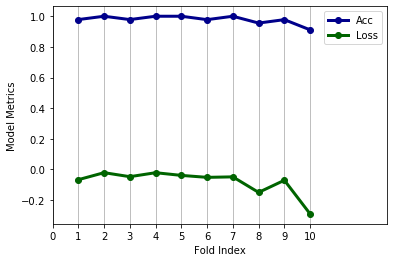

In [19]:
# Plot all model metrics along different ks
fig = plt.figure()
ax = fig.add_subplot(111)
ki = np.arange(1, 11, step=1)
plt.xticks(np.arange(0, 11, step=1))
ax.plot(ki, lst_kfold_acc, color='darkblue', marker='o', linewidth=3, label='Acc')
#ax.plot(ki, class_err_lst, color='orange', marker='o', linewidth=3, label='Loss')
ax.plot(ki, lst_kfold_loss, color='darkgreen', marker='o', linewidth=3, label='Loss')
#ax.plot(ki, recall_lst, color='yellow', marker='o', linewidth=3, label='Recall')
plt.xlabel('Fold Index')
plt.ylabel('Model Metrics')
ax.grid(axis='x')

ax.set_xlim(0.0, 13)

plt.legend()
plt.show()

Text(0.5, 257.44, 'Predicted label')

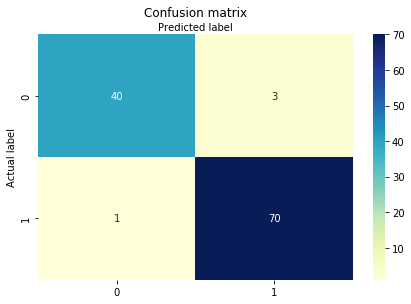

In [20]:
# find y predictions
y_pred = cross_val_predict(lr_kfold, X = X_test_sc, y=y_test, cv=kfold)

# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

print("Log Loss:",metrics.log_loss(y_test, y_pred))

# prints classification error of the model
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Accuracy: 0.9649122807017544
Log Loss: 1.211907933087135
Classification Error: 0.03508771929824561
Precision: 0.958904109589041
Recall/Sensitivity: 0.9859154929577465
Specificity: 0.9302325581395349
Class Distribution:

1    71
0    43
Name: targLabel, dtype: int64


### End of Extra Work(Not Part of hw)

---

---

---

---

## Problem 2
Repeat problem 1, but this time use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principle components that achieve the highest classification accuracy. Plot your classification accuracy, precision, and recall over a different number of Ks. Explain and elaborate on your results.

In [22]:
# Split dataset in features and target sets
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

# Features, '[]' is used because X is a matrix
X = cancer_dataframe[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = cancer_dataframe.targLabel

# Print out first five rows of the X set
X.head(70)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,14.780,23.94,97.40,668.3,0.11720,0.14790,0.12670,0.09029,0.1953,0.06654,...,17.31,33.39,114.60,925.1,0.1648,0.34160,0.30240,0.16140,0.3321,0.08911
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.33,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750


In [23]:
y.head(70)

0     0
1     0
2     0
3     0
4     0
     ..
65    0
66    1
67    1
68    1
69    1
Name: targLabel, Length: 70, dtype: int64

In [24]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (455, 30)
X_test dimension=  (114, 30)
y_train dimension=  (455,)
y_test dimension=  (114,)


In [25]:
# define the maximum k
kth_term = 31

# create lists to store different model metrics
acc_lst = []
class_err_lst = []
prec_lst = []
recall_lst = []
optimal_accuracy = 0
kth = 0

# train multiple log regression models with different ks
for k in range(1,kth_term):
    
    #print("k = ", k)
    
    
    # Create and fit PCA object
    # Transforming x_train and x_test   
    pca_final = PCA(n_components=k)
    principalComponents_train = pca_final.fit_transform(X_train)
    principalComponents_test = pca_final.transform(X_test)
    
    
    
    # Create an instance of Logistic Regression Classifier, fit the data and test the model.
    lm = LogisticRegression(max_iter=1000).fit(principalComponents_train,y_train)
    
    # Predicting the test set results
    y_pred=lm.predict(principalComponents_test)
    
    #print("Training set score: {:.5f}".format(lm.score(principalComponents, y_train)))
    #print("Test set score: {:.5f}".format(lm.score(X_test, y_test)))
    #print("Predictions: ", (y_pred))
    
    acc_lst.append(metrics.accuracy_score(y_test, y_pred))
    class_err_lst.append(1 - metrics.accuracy_score(y_test, y_pred))
    prec_lst.append(metrics.precision_score(y_test, y_pred))
    recall_lst.append(metrics.recall_score(y_test, y_pred))
    
    if ((metrics.accuracy_score(y_test, y_pred))> optimal_accuracy):
        optimal_accuracy = (metrics.accuracy_score(y_test, y_pred))
        kth = k
    else:
        continue



print("K : "+str(kth)+" | Optimal Accuraccy is : "+str(optimal_accuracy))

K : 3 | Optimal Accuraccy is : 0.9736842105263158


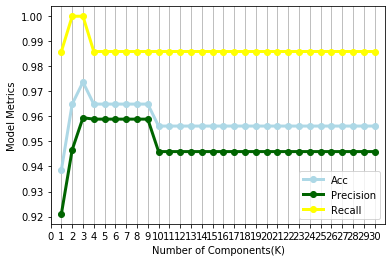

In [26]:
# Plot all model metrics along different ks
fig = plt.figure()
ax = fig.add_subplot(111)
ki = np.arange(1, kth_term, step=1)
plt.xticks(np.arange(0, kth_term, step=1))
ax.plot(ki, acc_lst, color='lightblue', marker='o', linewidth=3, label='Acc')
#ax.plot(ki, class_err_lst, color='orange', marker='o', linewidth=3, label='Loss')
ax.plot(ki, prec_lst, color='darkgreen', marker='o', linewidth=3, label='Precision')
ax.plot(ki, recall_lst, color='yellow', marker='o', linewidth=3, label='Recall')
plt.xlabel('Number of Components(K)')
plt.ylabel('Model Metrics')
ax.grid(axis='x')

ax.set_xlim(0.0, kth_term)

plt.legend()
plt.show()

---

---

### Extra Work(Not Part of hw)

**Determine optimal k**

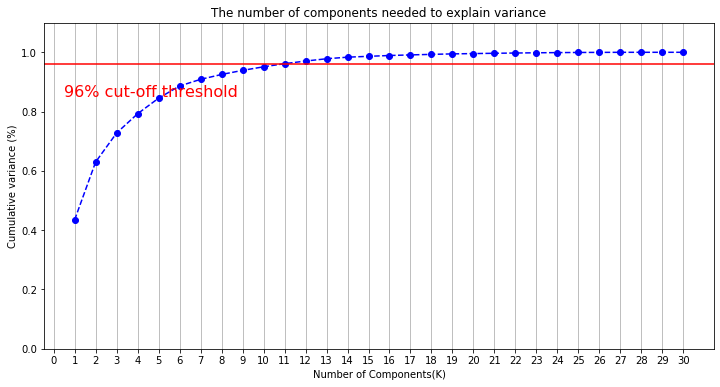

In [27]:
pca = PCA().fit(X_train_sc)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components(K)')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.96, color='r', linestyle='-')
plt.text(0.5, 0.85, '96% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

**Show diff model metrics using kfold**

In [28]:
kth_term = 31

acc_kfold = []
loss_kfold = []
prec_kfold = []
recall_kfold = []

for k in range(1,kth_term):
    
    #print("k = ", k)
    
    pca_final = PCA(n_components=k)
    principalComponents = pca_final.fit_transform(X_train)
    
    # Applying 5-Fold Cross Validation
    kfold = KFold(n_splits=10, random_state=100, shuffle= True)
    
    # create instance of log regression object
    lr_kfold = LogisticRegression(solver='lbfgs', max_iter=1000)
    
    # create kfold Logistic Regression model
    lst_kfold_acc = model_selection.cross_val_score(lr_kfold, X = principalComponents, y= y_train, cv=kfold, scoring="accuracy")
    lst_kfold_loss = model_selection.cross_val_score(lr_kfold, X = principalComponents, y= y_train, cv=kfold, scoring="neg_log_loss")
    lst_kfold_prec = model_selection.cross_val_score(lr_kfold, X = principalComponents, y= y_train, cv=kfold, scoring="precision")
    lst_kfold_recall = model_selection.cross_val_score(lr_kfold, X = principalComponents, y= y_train, cv=kfold, scoring="recall")
    
    
    #print("CV Accuracy: %.5f%%" % (lst_kfold_acc.mean()))
    #print("CV Loss: %.5f%%" % (lst_kfold_loss.mean()))
    #print("CV Precision: %.5f%%" % (lst_kfold_prec.mean()))
    #print("CV Recall: %.5f%%" % (lst_kfold_recall.mean()))
    
    acc_kfold.append(lst_kfold_acc.mean())
    loss_kfold.append(lst_kfold_loss.mean())
    prec_kfold.append(lst_kfold_prec.mean())
    recall_kfold.append(lst_kfold_recall.mean())


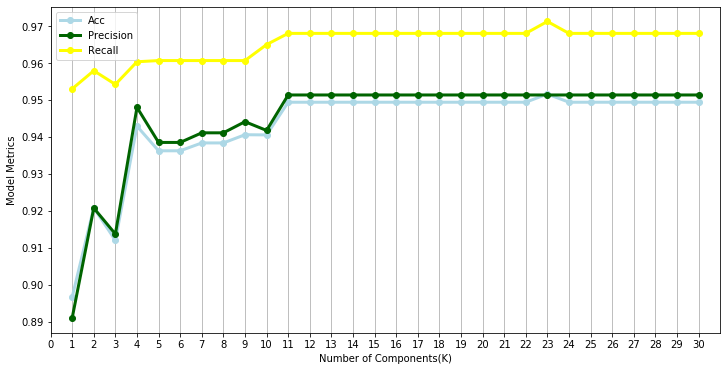

In [29]:
# Plot  accuracy, precision and recall accross different ks
fig = plt.figure()
ax = fig.add_subplot(111)
ki = np.arange(1, kth_term, step=1)
plt.xticks(np.arange(0, kth_term, step=1))
ax.plot(ki, acc_kfold, color='lightblue', marker='o', linewidth=3, label='Acc')
#ax.plot(ki, loss_kfold, color='orange', marker='o', linewidth=3, label='Loss')
ax.plot(ki, prec_kfold, color='darkgreen', marker='o', linewidth=3, label='Precision')
ax.plot(ki, recall_kfold, color='yellow', marker='o', linewidth=3, label='Recall')
plt.xlabel('Number of Components(K)')
plt.ylabel('Model Metrics')
ax.grid(axis='x')

ax.set_xlim(0.0, kth_term)

plt.legend()
plt.show()

### End of Extra Work(Not Part of hw)

---

---

---

---

## Problem 3
Repeat problem 2, but this time use the LDA feature extraction for your training. For the classification, use the built-in Bayes classifier for the classification. Report your classification accuracy, precision, and recall. Explain and elaborate on your results.

In [30]:
# Split dataset in features and target sets
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

# Features, '[]' is used because X is a matrix
X = cancer_dataframe[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = cancer_dataframe.targLabel

# Print out first five rows of the X set
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: targLabel, dtype: int64

In [32]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (455, 30)
X_test dimension=  (114, 30)
y_train dimension=  (455,)
y_test dimension=  (114,)


In [33]:
# create an instance of StandardScaler
sc = StandardScaler() 

# Scale the test and train data set. 
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# print out scaled datasets
print("Scaled training features:\n", X_train_sc)
print("\nScaled testing features:\n", X_test_sc)

Scaled training features:
 [[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]

Scaled testing features:
 [[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.792

In [34]:
# Implement LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_X_train = lda.fit_transform(X_train_sc,y_train)
lda_X_test = lda.transform(X_test_sc)

In [35]:
# Create an instance of Gaussian NB Classifier with LDA, fit the data and test the model.
gnb_model = GaussianNB()
gnb_mod = gnb_model.fit(lda_X_train, y_train)

y_pred = gnb_model.predict(lda_X_test)
print("Predictions: ", (y_pred))

Predictions:  [1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [36]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

# prints classification error of the model
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Accuracy: 0.956140350877193
Classification Error: 0.04385964912280704
Precision: 0.9714285714285714
Recall/Sensitivity: 0.9577464788732394
Specificity: 0.9302325581395349
Class Distribution:

1    71
0    43
Name: targLabel, dtype: int64


Text(0.5, 384.16, 'Predicted label')

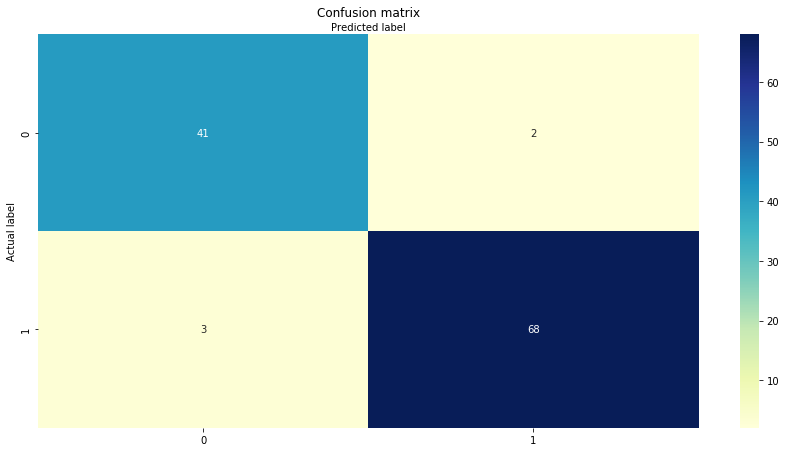

In [37]:
# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

---

---

---

---

## Problem 4
Can you repeat problem 3? This time, replace the Bayes classifier with logistic regression. Report your results (classification accuracy, precision, and recall). Compare your results against problem 2 and 3.

In [38]:
# Split dataset in features and target sets
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']

# Features, '[]' is used because X is a matrix
X = cancer_dataframe[feature_cols]

# Target variable, '.Outcome' is used because y is a vector
y = cancer_dataframe.targLabel

# Print out first five rows of the X set
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: targLabel, dtype: int64

In [40]:
# split X and y into training, testing sets and print out it's shape
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (455, 30)
X_test dimension=  (114, 30)
y_train dimension=  (455,)
y_test dimension=  (114,)


In [41]:
# create an instance of StandardScaler
sc = StandardScaler() 

# Scale the test and train data set. 
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# print out scaled datasets
print("Scaled training features:\n", X_train_sc)
print("\nScaled testing features:\n", X_test_sc)

Scaled training features:
 [[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]

Scaled testing features:
 [[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.792

In [42]:
# Implement LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_X_train = lda.fit_transform(X_train_sc,y_train)
lda_X_test = lda.transform(X_test_sc)

In [43]:
# Create an instance of Logistic Regression Classifier, fit the lda data and test the model.
lm = LogisticRegression().fit(lda_X_train,y_train)
y_pred=lm.predict(lda_X_test)

In [44]:
# print classification report
print(metrics.classification_report(y_test, y_pred))

# prints accuracy of the model
print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))

# prints classification error of the model
print("Classification Error:",1 - metrics.accuracy_score(y_test, y_pred))

# prints precision of the model
print("Precision:",metrics.precision_score(y_test, y_pred))

# prints recall of the model
print("Recall/Sensitivity:",metrics.recall_score(y_test, y_pred))

# prints specitivity of the model
#print("Specificity:",(cnf_matrix[0, 0] / (cnf_matrix[0, 0] + cnf_matrix[0, 1])))


# Calculate Null Accuracy to test our model
# calculate the percentage of ones
#percentage_ones = y_test.mean()

# calculate the percentage of zeros
#percentage_zero = 1 - y_test.mean()

# calculate null accuracy
#print("Null accuracy:", max(percentage_ones, percentage_zero))

# examine the class distribution of the testing set (using a Pandas Series method)
print("Class Distribution:\n")
print(y_test.value_counts())

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Accuracy: 0.9473684210526315
Classification Error: 0.052631578947368474
Precision: 0.9710144927536232
Recall/Sensitivity: 0.9436619718309859
Class Distribution:

1    71
0    43
Name: targLabel, dtype: int64


Text(0.5, 384.16, 'Predicted label')

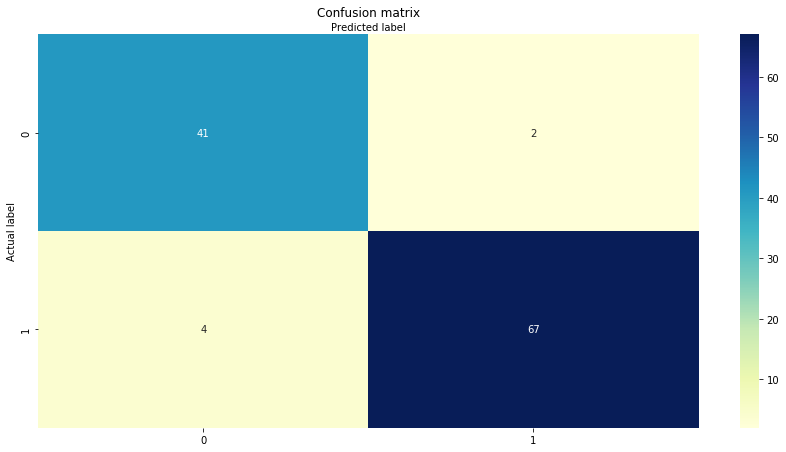

In [45]:
# Create confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

---

---

---

#### REFERENCES
* https://www.analyticsvidhya.com/blog/2021/04/mastering-exploratory-data-analysiseda-for-data-science-enthusiasts/



#### APPENDIX
**sklearn cross_val_score scoring options**

**For Regression**
'explained_variance'
'max_error'
'neg_mean_absolute_error'
'neg_mean_squared_error'
'neg_root_mean_squared_error'
'neg_mean_squared_log_error'
'neg_median_absolute_error'
'r2'
'neg_mean_poisson_deviance'
'neg_mean_gamma_deviance'
'neg_mean_absolute_percentage_error'

**For Classification**
'accuracy'
'balanced_accuracy'
'top_k_accuracy'
'average_precision'
'neg_brier_score'
'f1'
'f1_micro'
'f1_macro'
'f1_weighted'
'f1_samples'
'neg_log_loss'
'precision' 
'recall' 
'jaccard' 
'roc_auc'
'roc_auc_ovr'
'roc_auc_ovo'
'roc_auc_ovr_weighted'
'roc_auc_ovo_weighted'